In [38]:
import numpy as np
import scipy.io as sio
import os
import dgFuncs as dg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#in_fname='/Users/davidgroppe/PycharmProjects/SZR_ANT/MODELS/genLogregSe_1/classify_metrics_srch.npz'
in_fname='/home/dgroppe/GIT/SZR_ANT/MODELS/gen16_logreg_se_ewts_1/classify_metrics_srch.npz'
npz=np.load(in_fname)
print(npz.keys())

['valid_sens', 'valid_spec', 'valid_bal_acc', 'best_valid_bal_acc_by_sub', 'train_sens', 'train_spec', 'train_bal_acc', 'train_subs_list', 'mn_stim_latency', 'pptn_missed_szrs', 'pptn_preonset_stim', 'n_train_steps', 'rand_ct', 'C_vals', 'gamma_vals', 'tried_C', 'tried_gamma', 'tried_train_acc', 'tried_valid_acc', 'best_valid_bal_acc', 'best_train_bal_acc', 'best_C', 'best_gam', 'best_models', 'equal_sub_wts', 'ftr_types', 'left_out_id']


In [4]:
print(npz['train_subs_list'])
#print(npz['uni_subs'])
print(len(npz['valid_sens']))

[ 115  253  264  273  442  565  590  620  862  922  958  970 1077 1096 1125]
15


In [34]:
npz=np.load('/home/dgroppe/EU_YHAT/1125_svmAesFinale_1/112500102_0000_yhat.npz')
print(npz.keys())
print(np.sum(npz['max_yhat']>0.5))
sio.savemat('/home/dgroppe/GIT/SZR_ANT/temp_1125_inter.mat',npz)

['max_yhat', 'yhat_soz_chans', 'yhat_sec']
1652


In [35]:
in_fname='/home/dgroppe/GIT/SZR_ANT/MODELS/svmKdsampSeAes8_19/classify_metrics_srch.npz'
npz=np.load(in_fname)
print(npz.keys())

['valid_sens', 'valid_spec', 'valid_bal_acc', 'best_valid_bal_acc_by_sub', 'train_sens', 'train_spec', 'train_bal_acc', 'train_subs_list', 'n_train_steps', 'C_vals', 'gam', 'tried_C', 'tried_gamma', 'tried_train_acc', 'tried_valid_acc', 'best_valid_bal_acc', 'best_train_bal_acc', 'equal_sub_wts', 'best_C', 'best_gam', 'best_models', 'ftr_types', 'left_out_id']


In [45]:
print(npz['valid_bal_acc'])
np.mean(npz['valid_bal_acc'])
mn, ci_low, ci_hi=dg.mean_and_cis(npz['valid_bal_acc'])
print('Validation Data')
print(mn)
print(ci_low)
print(ci_hi)
print('Training Data')
mn, ci_low, ci_hi=dg.mean_and_cis(npz['train_bal_acc'])
print(mn)
print(ci_low)
print(ci_hi)

[ 0.89505134  0.68968614  0.89284057  0.9381464   0.88816864  0.91024476
  0.84807369  0.62778511]
Validation Data
0.836249581547
0.747432385681
0.925066777413
Training Data
0.93707112363
0.930004703389
0.944137543871


In [ ]:
mn, ci=dg.mean_and_cis

done


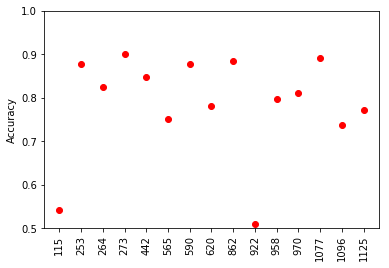

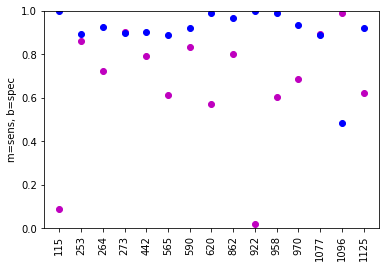

In [5]:
# Plot Accuracy
plt.figure(1)
plt.clf()
plt.plot(npz['best_valid_bal_acc_by_sub'],'ro')
plt.ylim([0.5, 1])
plt.xticks(np.arange(0,len(npz['train_subs_list'])),npz['train_subs_list'].astype('int'),rotation='vertical')
plt.ylabel('Accuracy')

# Plot Sensitivity & Specificity
plt.figure(2)
plt.clf()
plt.plot(npz['valid_sens'],'mo')
plt.plot(npz['valid_spec'],'bo')
plt.ylim([0, 1])
plt.xticks(np.arange(0,len(npz['train_subs_list'])),npz['train_subs_list'].astype('int'),rotation='vertical')
plt.ylabel('m=sens, b=spec')
print('done')

In [25]:
#y_fname='/home/dgroppe/EU_Y/862_all_labels/862_y_86201102_0140.mat'
y_fname='/home/dgroppe/EU_Y/862_all_labels/862_y_86201102_0141.mat'
y_dict=sio.loadmat(y_fname)
print(y_dict.keys())
print(y_dict['se_time_sec'].shape)
print(y_dict['se_szr_class'].shape)
print(y_dict['time_dec'].shape)
print(y_dict['szr_class_dec'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'se_szr_class', 'se_time_sec', 'szr_class_dec', 'time_dec'])
(1, 35436)
(1, 34259)
(1, 921600)
(1, 921600)


In [26]:
yhat=np.load('/home/dgroppe/EU_YHAT/862_svmAesFinale_1/86201102_0141_yhat.npz')
print(yhat.keys())
print(yhat['max_yhat'].shape)

['max_yhat', 'yhat_soz_chans', 'yhat_sec']
(34259,)


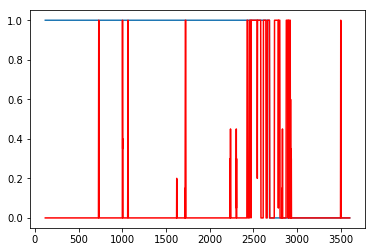

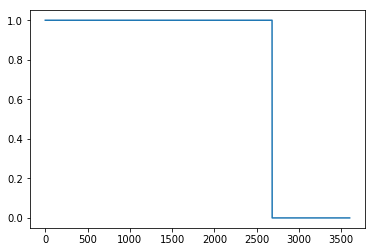

In [28]:
plt.figure(10)
plt.clf()
plt.plot(y_dict['se_time_sec'][0,1177:].T,y_dict['se_szr_class'].T);
plt.plot(yhat['yhat_sec'].T,yhat['max_yhat'],'r-')

plt.figure(11)
plt.clf()
plt.plot(y_dict['time_dec'].T,y_dict['szr_class_dec'].T);